<a href="https://colab.research.google.com/github/UniqueCODER/AlgorithmsPython/blob/master/mrt_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/meduim/MRT_dataset.xlsx')


,Month,Month_numeric_number,Project,Total_Passengers,Average_a_Number_of _Passengers_Per_ Day,Average_a_Number_of _Passengers_weekday,Average_a_Number_of _Passenger_weekend
0,Jan,1,M.R.T. Chaloem Ratchamongkhon line,8613608,277858,316029,184553
1,Feb,2,M.R.T. Chaloem Ratchamongkhon line,8212613,293308,329204,217526
2,Mar,3,M.R.T. Chaloem Ratchamongkhon line,8123428,262046,287668,208239
3,Apr,4,M.R.T. Chaloem Ratchamongkhon line,6990396,233013,285863,153738
4,May,5,M.R.T. Chaloem Ratchamongkhon line,7265594,234374,276809,175618
5,Jun,6,M.R.T. Chaloem Ratchamongkhon line,7398749,246625,278105,173170
6,Jul,7,M.R.T. Chaloem Ratchamongkhon line,7536115,243100,280717,164107
7,Aug,8,M.R.T. Chaloem Ratchamongkhon line,7481573,241341,290853,162947
8,Sep,9,M.R.T. Chaloem Ratchamongkhon line,7688292,256276,285607,175618
9,Oct,10,M.R.T. Chaloem Ratchamongkhon line,8183154,263973,291999,195463


In [ ]:
df.head(5)

,month,month_num,project,monthly_total,avg_daily,avg_weekly,avg_weekend
0,Jan,1,M.R.T. Chaloem Ratchamongkhon line,8613608,277858,316029,184553
1,Feb,2,M.R.T. Chaloem Ratchamongkhon line,8212613,293308,329204,217526
2,Mar,3,M.R.T. Chaloem Ratchamongkhon line,8123428,262046,287668,208239
3,Apr,4,M.R.T. Chaloem Ratchamongkhon line,6990396,233013,285863,153738
4,May,5,M.R.T. Chaloem Ratchamongkhon line,7265594,234374,276809,175618


In [ ]:
df.tail(5)

,month,month_num,project,monthly_total,avg_daily,avg_weekly,avg_weekend
151,Jul,7,The M.R.T . Chalong Ratchadham Line,466159,15037,18583,8590
152,Aug,8,The M.R.T . Chalong Ratchadham Line,379297,12235,14893,6655
153,Sep,9,The M.R.T . Chalong Ratchadham Line,571916,19064,21269,13918
154,Oct,10,The M.R.T . Chalong Ratchadham Line,786150,25360,29789,19227
155,Nov,11,The M.R.T . Chalong Ratchadham Line,1029934,34331,38315,23376


In [ ]:
df.info

<bound method DataFrame.info of     Month  ...  Average_a_Number_of _Passenger_weekend
0     Jan  ...                                  184553
1     Feb  ...                                  217526
2     Mar  ...                                  208239
3     Apr  ...                                  153738
4     May  ...                                  175618
..    ...  ...                                     ...
151   Jul  ...                                    8590
152   Aug  ...                                    6655
153   Sep  ...                                   13918
154   Oct  ...                                   19227
155   Nov  ...                                   23376

[156 rows x 7 columns]>

In [ ]:
df.describe()

,Month_numeric_number,Total_Passengers,Average_a_Number_of _Passengers_Per_ Day,Average_a_Number_of _Passengers_weekday,Average_a_Number_of _Passenger_weekend
count,156.000000,1.560000e+02,156.000000,156.000000,156.000000
mean,6.474359,5.385275e+06,177380.589744,205715.724359,122244.083333
std,3.436894,3.815928e+06,125704.310061,144173.286240,89389.982939
min,1.000000,3.792970e+05,12235.000000,14893.000000,6655.000000
25%,3.750000,1.477453e+06,48625.750000,57877.000000,32061.250000
50%,6.500000,7.363571e+06,237784.500000,281808.000000,160652.500000
75%,9.000000,8.755072e+06,288673.250000,333480.000000,199226.750000
max,12.000000,1.238301e+07,412767.000000,459420.000000,332185.000000


In [ ]:
df.columns

Index(['Month', 'Month_numeric_number', 'Project', 'Total_Passengers',
       'Average_a_Number_of _Passengers_Per_ Day',
       'Average_a_Number_of _Passengers_weekday',
       'Average_a_Number_of _Passenger_weekend'],
      dtype='object')

In [ ]:
df.rename(columns=  {"Month": "month", "Month_numeric_number": "month_num",
                      "Project": "project","Average_a_Number_of _Passengers_Per_ Day": "avg_daily",
                      "Average_a_Number_of _Passengers_weekday": "avg_weekly",
                      "Average_a_Number_of _Passenger_weekend": "avg_weekend"}) 
df

,Month,Month_numeric_number,Project,Total_Passengers,Average_a_Number_of _Passengers_Per_ Day,Average_a_Number_of _Passengers_weekday,Average_a_Number_of _Passenger_weekend
0,Jan,1,M.R.T. Chaloem Ratchamongkhon line,8613608,277858,316029,184553
1,Feb,2,M.R.T. Chaloem Ratchamongkhon line,8212613,293308,329204,217526
2,Mar,3,M.R.T. Chaloem Ratchamongkhon line,8123428,262046,287668,208239
3,Apr,4,M.R.T. Chaloem Ratchamongkhon line,6990396,233013,285863,153738
4,May,5,M.R.T. Chaloem Ratchamongkhon line,7265594,234374,276809,175618
...,...,...,...,...,...,...,...
151,Jul,7,The M.R.T . Chalong Ratchadham Line,466159,15037,18583,8590
152,Aug,8,The M.R.T . Chalong Ratchadham Line,379297,12235,14893,6655
153,Sep,9,The M.R.T . Chalong Ratchadham Line,571916,19064,21269,13918
154,Oct,10,The M.R.T . Chalong Ratchadham Line,786150,25360,29789,19227


In [ ]:
df.rename(columns={'Month':'month', "Month_numeric_number": "month_num",
                   "Project": "project","Total_Passengers": "monthly_total",
                   "Average_a_Number_of _Passengers_Per_ Day": "avg_daily",
                   "Average_a_Number_of _Passengers_weekday": "avg_weekly",
                    "Average_a_Number_of _Passenger_weekend": "avg_weekend"}, inplace=True)
df

,month,month_num,project,monthly_total,avg_daily,avg_weekly,avg_weekend
0,Jan,1,M.R.T. Chaloem Ratchamongkhon line,8613608,277858,316029,184553
1,Feb,2,M.R.T. Chaloem Ratchamongkhon line,8212613,293308,329204,217526
2,Mar,3,M.R.T. Chaloem Ratchamongkhon line,8123428,262046,287668,208239
3,Apr,4,M.R.T. Chaloem Ratchamongkhon line,6990396,233013,285863,153738
4,May,5,M.R.T. Chaloem Ratchamongkhon line,7265594,234374,276809,175618
...,...,...,...,...,...,...,...
151,Jul,7,The M.R.T . Chalong Ratchadham Line,466159,15037,18583,8590
152,Aug,8,The M.R.T . Chalong Ratchadham Line,379297,12235,14893,6655
153,Sep,9,The M.R.T . Chalong Ratchadham Line,571916,19064,21269,13918
154,Oct,10,The M.R.T . Chalong Ratchadham Line,786150,25360,29789,19227


In [ ]:
df.shape

(156, 7)

# **Questions and Analysis output**

1. 2021 - 2016 comparison rate of passengers
2. Year with most number of passengers
3. Year with the least number of passengers


# **Splitting the Datasets into years**
since 2021 is the latest year gathered excluding the month of december we will split the dataset by 12


In [ ]:
df_2021 = df.iloc[145:156] # In this case it's Jan-Nov 
df_2021.insert(2, 'year', 2021)
df_2021

,month,month_num,year,project,monthly_total,avg_daily,avg_weekly,avg_weekend
145,Jan,1,2021,The M.R.T . Chalong Ratchadham Line,874003,28194,34487,16750
146,Feb,2,2021,The M.R.T . Chalong Ratchadham Line,1081904,38639,45915,25543
147,Mar,3,2021,The M.R.T . Chalong Ratchadham Line,1519467,49015,55731,29707
148,Apr,4,2021,The M.R.T . Chalong Ratchadham Line,793625,26454,34035,16541
149,May,5,2021,The M.R.T . Chalong Ratchadham Line,521799,16832,21761,10848
150,Jun,6,2021,The M.R.T . Chalong Ratchadham Line,677959,22599,26239,14104
151,Jul,7,2021,The M.R.T . Chalong Ratchadham Line,466159,15037,18583,8590
152,Aug,8,2021,The M.R.T . Chalong Ratchadham Line,379297,12235,14893,6655
153,Sep,9,2021,The M.R.T . Chalong Ratchadham Line,571916,19064,21269,13918
154,Oct,10,2021,The M.R.T . Chalong Ratchadham Line,786150,25360,29789,19227


In [ ]:
df_2020 = df.iloc[133:145] # In this case it's Jan-Nov 
df_2020.insert(2, 'year', 2020)
df_2020

,month,month_num,year,project,monthly_total,avg_daily,avg_weekly,avg_weekend
133,Jan,1,2020,The M.R.T . Chalong Ratchadham Line,1827785,58961,67781,37401
134,Feb,2,2020,The M.R.T . Chalong Ratchadham Line,1664132,57384,68406,36442
135,Mar,3,2020,The M.R.T . Chalong Ratchadham Line,1227632,39601,47436,20450
136,Apr,4,2020,The M.R.T . Chalong Ratchadham Line,439198,14640,18001,6797
137,May,5,2020,The M.R.T . Chalong Ratchadham Line,674483,21758,28009,14167
138,Jun,6,2020,The M.R.T . Chalong Ratchadham Line,1094334,36478,41688,24320
139,Jul,7,2020,The M.R.T . Chalong Ratchadham Line,1442882,46545,57069,29882
140,Aug,8,2020,The M.R.T . Chalong Ratchadham Line,1643622,53020,63799,33422
141,Sep,9,2020,The M.R.T . Chalong Ratchadham Line,1754362,58479,70104,35228
142,Oct,10,2020,The M.R.T . Chalong Ratchadham Line,1759392,56755,69885,32882


In [ ]:
df_2019 = df.iloc[121:133] # In this case it's Jan-Nov 
df_2019.insert(2, 'year', 2019)
df_2019

,month,month_num,year,project,monthly_total,avg_daily,avg_weekly,avg_weekend
121,Jan,1,2019,The M.R.T . Chalong Ratchadham Line,1591763,51347,59159,32252
122,Feb,2,2019,The M.R.T . Chalong Ratchadham Line,1443333,51548,60349,32967
123,Mar,3,2019,The M.R.T . Chalong Ratchadham Line,1664735,53701,61262,37284
124,Apr,4,2019,The M.R.T . Chalong Ratchadham Line,1458908,48630,61016,30052
125,May,5,2019,The M.R.T . Chalong Ratchadham Line,1530913,52790,62586,34177
126,Jun,6,2019,The M.R.T . Chalong Ratchadham Line,1675410,55847,67272,36112
127,Jul,7,2019,The M.R.T . Chalong Ratchadham Line,1745717,56313,67705,35601
128,Aug,8,2019,The M.R.T . Chalong Ratchadham Line,1809166,58360,68989,36039
129,Sep,9,2019,The M.R.T . Chalong Ratchadham Line,1743133,58104,67377,36468
130,Oct,10,2019,The M.R.T . Chalong Ratchadham Line,1729692,55797,65407,35614


In [ ]:
df_2018 = df.iloc[109:121] # In this case it's Jan-Nov 
df_2018.insert(2, 'year', 2018)
df_2018

,month,month_num,year,project,monthly_total,avg_daily,avg_weekly,avg_weekend
109,Jan,1,2018,The M.R.T . Chalong Ratchadham Line,1325182,42748,50011,27495
110,Feb,2,2018,The M.R.T . Chalong Ratchadham Line,1266376,45228,51381,29846
111,Mar,3,2018,The M.R.T . Chalong Ratchadham Line,1395112,45004,51731,30877
112,Apr,4,2018,The M.R.T . Chalong Ratchadham Line,1224975,40833,51597,26756
113,May,5,2018,The M.R.T . Chalong Ratchadham Line,1396565,45050,53101,30412
114,Jun,6,2018,The M.R.T . Chalong Ratchadham Line,1498926,49964,57088,33341
115,Jul,7,2018,The M.R.T . Chalong Ratchadham Line,1507014,48613,58741,30199
116,Aug,8,2018,The M.R.T . Chalong Ratchadham Line,1680922,54223,62892,33034
117,Sep,9,2018,The M.R.T . Chalong Ratchadham Line,1603576,53453,62352,35653
118,Oct,10,2018,The M.R.T . Chalong Ratchadham Line,1590420,51304,60299,32414


In [ ]:
df_2017 = df.iloc[97:109] # In this case it's Jan-Nov 
df_2017.insert(2, 'year', 2017)
df_2017

,month,month_num,year,project,monthly_total,avg_daily,avg_weekly,avg_weekend
97,Jan,1,2017,The M.R.T . Chalong Ratchadham Line,634552,20469,24282,13538
98,Feb,2,2017,The M.R.T . Chalong Ratchadham Line,611029,21822,25410,14248
99,Mar,3,2017,The M.R.T . Chalong Ratchadham Line,719225,23201,25447,16741
100,Apr,4,2017,The M.R.T . Chalong Ratchadham Line,631343,21045,25678,15750
101,May,5,2017,The M.R.T . Chalong Ratchadham Line,748456,24144,28127,16901
102,Jun,6,2017,The M.R.T . Chalong Ratchadham Line,817301,27243,30217,19066
103,Jul,7,2017,The M.R.T . Chalong Ratchadham Line,823504,26565,31501,18749
104,Aug,8,2017,The M.R.T . Chalong Ratchadham Line,1331334,42946,47655,31436
105,Sep,9,2017,The M.R.T . Chalong Ratchadham Line,1407258,46909,52322,34278
106,Oct,10,2017,The M.R.T . Chalong Ratchadham Line,1376904,45897,53861,32140


In [ ]:
df_2016 = df.iloc[84:97] # In this case it's Jan-Nov 
df_2016.insert(2, 'year', 2016)
df_2016

,month,month_num,year,project,monthly_total,avg_daily,avg_weekly,avg_weekend
84,Jan,1,2016,M.R.T. Chaloem Ratchamongkhon line,4688335,151237,181313,96552
85,Feb,2,2016,M.R.T. Chaloem Ratchamongkhon line,6093370,217620,250578,158297
86,Mar,3,2016,M.R.T. Chaloem Ratchamongkhon line,8450621,272601,307103,173407
87,Apr,4,2016,M.R.T. Chaloem Ratchamongkhon line,4406056,146869,185429,96443
88,May,5,2016,M.R.T. Chaloem Ratchamongkhon line,2800173,90346,115586,56696
89,Jun,6,2016,M.R.T. Chaloem Ratchamongkhon line,3628010,120934,139640,77286
90,Jul,7,2016,M.R.T. Chaloem Ratchamongkhon line,2393607,77213,95048,44786
91,Aug,8,2016,M.R.T. Chaloem Ratchamongkhon line,1934287,62396,75624,34617
92,Aug,8,2016,The M.R.T . Chalong Ratchadham Line,524472,20172,20492,19568
93,Sep,9,2016,The M.R.T . Chalong Ratchadham Line,629963,20999,22658,16437


In [ ]:
final = [df_2021, df_2020, df_2019, df_2018, df_2017]
df_final = pd.concat(final)
df_final.reset_index(inplace=True)
df_final

,index,month,month_num,year,project,monthly_total,avg_daily,avg_weekly,avg_weekend
0,145,Jan,1,2021,The M.R.T . Chalong Ratchadham Line,874003,28194,34487,16750
1,146,Feb,2,2021,The M.R.T . Chalong Ratchadham Line,1081904,38639,45915,25543
2,147,Mar,3,2021,The M.R.T . Chalong Ratchadham Line,1519467,49015,55731,29707
3,148,Apr,4,2021,The M.R.T . Chalong Ratchadham Line,793625,26454,34035,16541
4,149,May,5,2021,The M.R.T . Chalong Ratchadham Line,521799,16832,21761,10848
5,150,Jun,6,2021,The M.R.T . Chalong Ratchadham Line,677959,22599,26239,14104
6,151,Jul,7,2021,The M.R.T . Chalong Ratchadham Line,466159,15037,18583,8590
7,152,Aug,8,2021,The M.R.T . Chalong Ratchadham Line,379297,12235,14893,6655
8,153,Sep,9,2021,The M.R.T . Chalong Ratchadham Line,571916,19064,21269,13918
9,154,Oct,10,2021,The M.R.T . Chalong Ratchadham Line,786150,25360,29789,19227


In [ ]:
yearly = df_final.groupby(['year'])[['monthly_total']].agg('sum')
yearly

,monthly_total
year,
2017,11746087
2018,17624794
2019,19722867
2020,16836631
2021,8702213


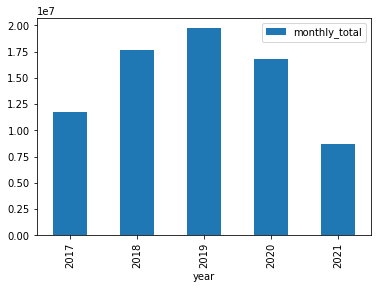

In [ ]:
yearly.plot.bar()

In [ ]:
df_pivot = df_final.pivot("year", "month_num", "monthly_total").fillna(0)
df_pivot

month_num,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2017,634552.0,611029.0,719225.0,631343.0,748456.0,817301.0,823504.0,1331334.0,1407258.0,1376904.0,1395555.0,1249626.0
2018,1325182.0,1266376.0,1395112.0,1224975.0,1396565.0,1498926.0,1507014.0,1680922.0,1603576.0,1590420.0,1652091.0,1483635.0
2019,1591763.0,1443333.0,1664735.0,1458908.0,1530913.0,1675410.0,1745717.0,1809166.0,1743133.0,1729692.0,1755398.0,1574699.0
2020,1827785.0,1664132.0,1227632.0,439198.0,674483.0,1094334.0,1442882.0,1643622.0,1754362.0,1759392.0,1745557.0,1563252.0
2021,874003.0,1081904.0,1519467.0,793625.0,521799.0,677959.0,466159.0,379297.0,571916.0,786150.0,1029934.0,0.0


In [ ]:
df_pivot = df_final.pivot("year", "month_num", "monthly_total").fillna(0)
df_pivot.columns


Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='month_num')

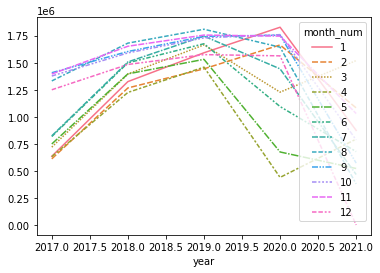

In [ ]:
sns.lineplot(data=df_pivot)

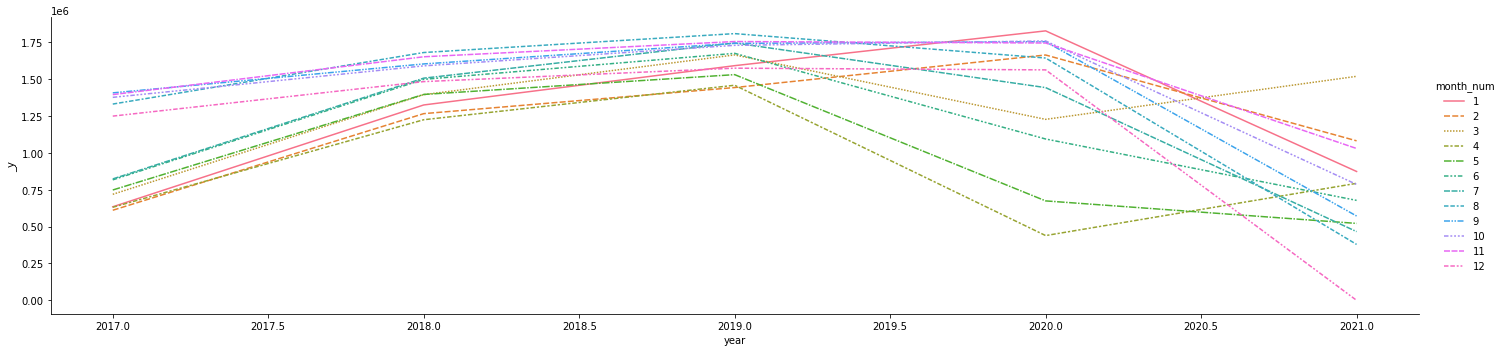

In [ ]:
sns.relplot(
    data=df_final,
    height=5, aspect=4, 
    kind="line"
)

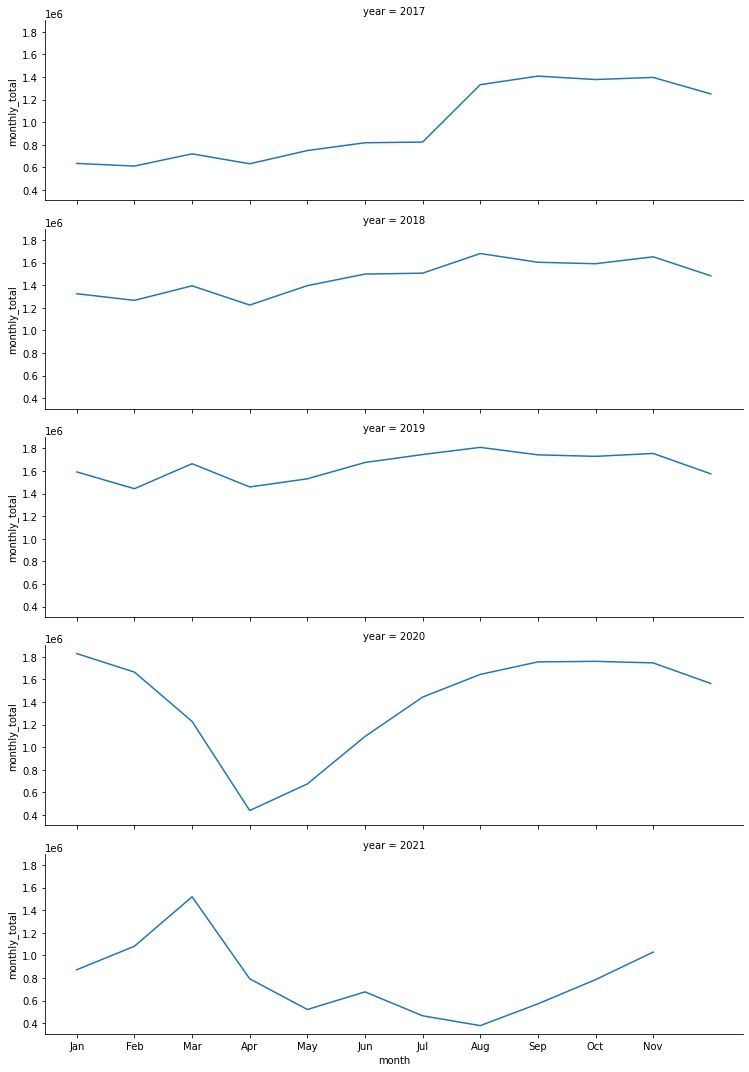

In [ ]:
sns.relplot(
    data=df_final, x="month", y="monthly_total", 
    row="year",
    height=3, aspect=3.5,
    kind="line"
)

The relplot function provides a simple and intuitive method for creating relational plots. It is also quite easy to modify the certain features of a plot such as font size, title, axes labels, and so on.